In [3]:
import cv2
import numpy as np
import pandas as pd
import os
import collections
from matplotlib import pyplot as plt
from sklearn.feature_extraction import image
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE as tsne
from kmodes.kmodes import KModes

In [29]:
img_width, img_height = 100,100
img_patches = 80

In [30]:
images_path = './practical_stuff/all_images/'
labels_path = './practical_stuff/labels.txt'

In [175]:
# read images information
# work on the first 500 records
labels = pd.read_csv(labels_path, sep = ',', header = None, names = ['class','image'])
labels = labels.reset_index()
#labels = labels[:500]

In [131]:
labels.head()

,index,class,image
0,0,other,2378600.jpeg
1,1,other,2378687.jpeg
2,2,other,2379071.jpeg
3,3,other,2379113.jpeg
4,4,other,2379591.jpeg


In [176]:
# preparong place holder
all_imgs_patches = np.zeros((labels.shape[0], ((img_width-img_patches)+1)**2, 64))
all_imgs_patches.shape

(3119, 441, 64)

In [177]:
# a 3D color histogram that gives a list of numbers used to charactrize the color distribution of images 
def cal_hist(img_patches):
    hist_patches = []
    hist_patches =[cv2.calcHist([img], [0,1,2], None, [4,4,4], [0,256,0,256,0,256]).flatten() for img in img_patches]
    return np.asarray(hist_patches)

In [178]:
def process_images(row):
    try:
        img_path = os.path.join(images_path+row['image'].strip())
        img = cv2.imread(img_path)
        img = cv2.resize(img, (img_width,img_height))
        patches = image.extract_patches_2d(img, (img_patches, img_patches))
        hist_p = cal_hist(patches)
        all_imgs_patches[row['index']] = hist_p
    except: 
        pass

In [179]:
labels.apply(lambda x: process_images(x), axis =1)

0       None
1       None
2       None
3       None
4       None
5       None
6       None
7       None
8       None
9       None
10      None
11      None
12      None
13      None
14      None
15      None
16      None
17      None
18      None
19      None
20      None
21      None
22      None
23      None
24      None
25      None
26      None
27      None
28      None
29      None
        ... 
3089    None
3090    None
3091    None
3092    None
3093    None
3094    None
3095    None
3096    None
3097    None
3098    None
3099    None
3100    None
3101    None
3102    None
3103    None
3104    None
3105    None
3106    None
3107    None
3108    None
3109    None
3110    None
3111    None
3112    None
3113    None
3114    None
3115    None
3116    None
3117    None
3118    None
Length: 3119, dtype: object

In [185]:
all_imgs_patches = all_imgs_patches.reshape((labels.shape[0]*((img_width-img_patches)+1)**2, 64))

In [186]:
all_imgs_patches.shape

(1375479, 64)

In [187]:
kmeans = KMeans(n_clusters = 10)
#fitting the input features
clustered_features = kmeans.fit(all_imgs_patches)

In [188]:
# getting the cluster labels 
cluster_labels = kmeans.predict(all_imgs_patches)
cluster_labels = cluster_labels.reshape(labels.shape[0], ((img_width-img_patches)+1)**2)
cluster_labels.shape

(3119, 441)

In [198]:
km = KModes(n_clusters=10, init='Huang', n_init=5, verbose =0)

In [199]:
kmode_clusters = km.fit_predict(cluster_labels)

In [200]:
kmode_clusters

array([1, 2, 1, ..., 8, 9, 3], dtype=uint8)

In [201]:
collections.Counter(kmode_clusters)

Counter({0: 317,
         1: 452,
         2: 372,
         3: 382,
         4: 248,
         5: 417,
         6: 37,
         7: 139,
         8: 364,
         9: 391})

In [202]:
arranged_clusters = np.argsort(kmode_clusters)
arranged_clusters

array([1333,  917,  318, ..., 2758,  615, 1334])

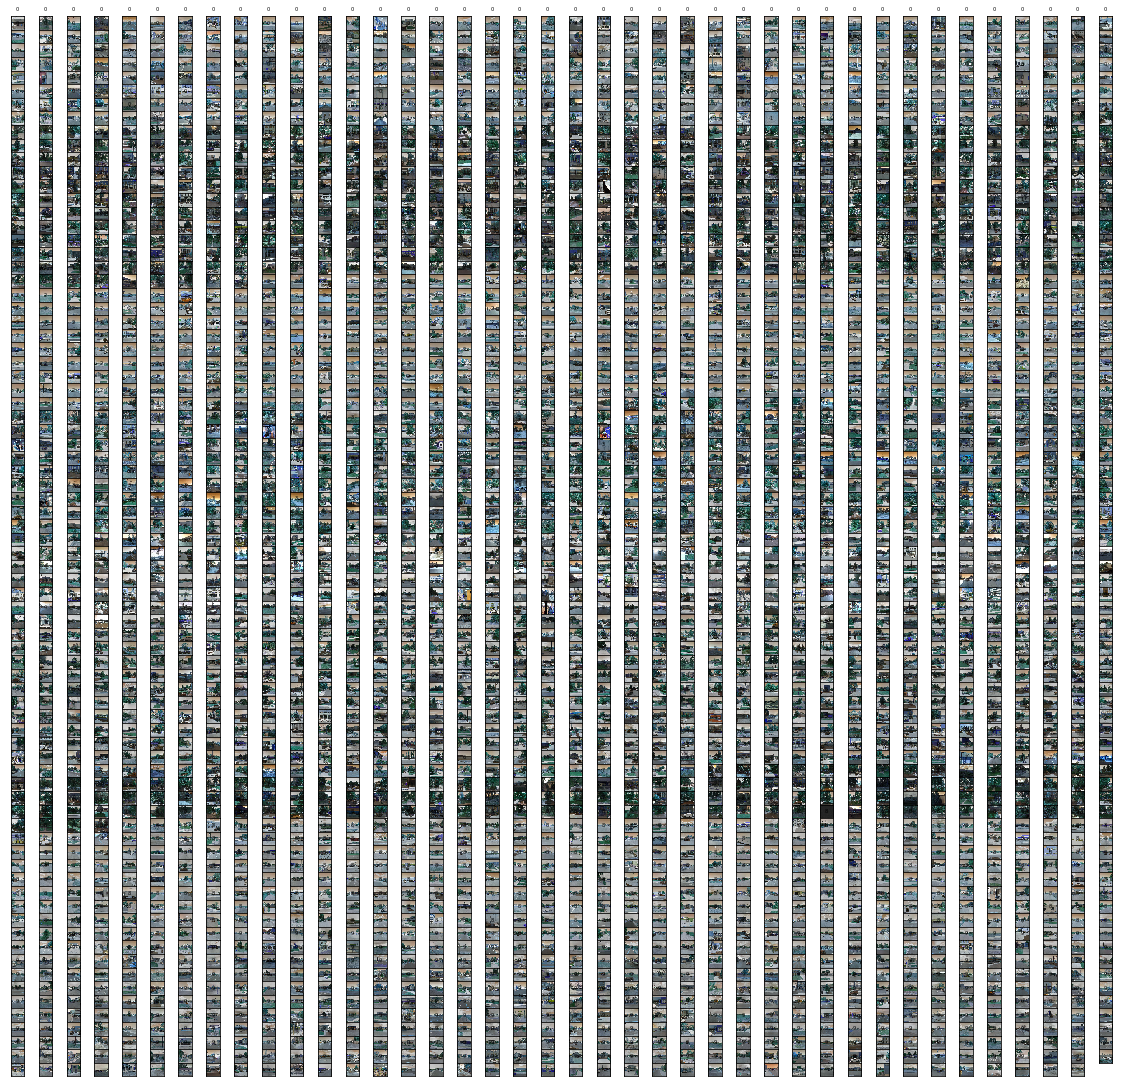

In [212]:
# disply similar images
# this might take some time to display all images
width, height = 20, 20
fig = plt.figure(figsize=(width,height))
columns = 40
rows = 80

for i, index in enumerate(arranged_clusters[:columns*rows]):
    #img = np.random.randint(10, size =(height,width))
    img_path = os.path.join(images_path + labels.ix[index]['image'].strip())
    img = cv2.imread(img_path)
    img = cv2.resize(img, (width,height))
    fig.add_subplot(rows, columns, i+1)
    plt.title(kmode_clusters[index], fontsize = 5)
    plt.gca().set_xticks([])
    plt.gca().set_yticks([])
    plt.imshow(img)
plt.subplots_adjust(wspace = 0, hspace =0)
plt.show()